# CSCI6380 Data Mining: Assignment #4
## Adnan Kivanc Corut

### Importing Libraries

In [82]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import decomposition, datasets
from sklearn import preprocessing
from sklearn import tree 
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn import metrics
from scipy import stats
from scipy.stats import ttest_rel, ttest_ind
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, LogisticRegression

## Breast Cancer

### Data Preperation

In [11]:
df_cancer = pd.read_csv("/Users/kivanc/DataMining-ML/Data/ModelDev/breast_cancer.csv", sep=',')
df_cancer.head()

,ID,radiusMean,radiusStandardError,radiusLargest,textureMean,textureStandardError,textureLargest,perimeterMean,perimeterStandardError,perimeterLargest,...,concavePointsMean,concavePointsStandardError,concavePointsLargest,symmetryMean,symmetryStandardError,symmetryLargest,fractalDimensionMean,fractalDimensionStandardError,fractalDimensionLargest,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [12]:
X_cancer = df_cancer.iloc[:, 1:-1]
y_cancer = df_cancer.iloc[:, -1]

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

### Train Test Split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size = .25, random_state= 42)

### Grid Search - Breast Cancer

#### Decision Tree Classifier

In [49]:
pca = PCA()
dt_clf = tree.DecisionTreeClassifier()

pipe_dt = Pipeline([
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA()),
        ('classifier', dt_clf)
        ])

# (the number of features in X + 1)
n_features_to_test = list(range(1,X_cancer.shape[1]+1,1))
scalers_to_test = [StandardScaler(), RobustScaler(), MinMaxScaler()]

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]



params_dt = {'scaler': scalers_to_test,
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': n_features_to_test,
        'classifier__criterion': criterion,
        'classifier__max_depth': max_depth}

gridsearch_dt = GridSearchCV(pipe_dt, params_dt, cv = 10, verbose=1, n_jobs=4)
gridsearch_dt.fit(train_features, train_labels)
gridsearch_dt.best_params_

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  88 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 4616 tasks      | elapsed:   15.6s
[Parallel(n_jobs=4)]: Done 10800 out of 10800 | elapsed:   36.0s finished


{'classifier__criterion': 'gini',
 'classifier__max_depth': 12,
 'reduce_dim': PCA(n_components=5),
 'reduce_dim__n_components': 5,
 'scaler': MinMaxScaler()}

In [ ]:
#### Random Forest Classifier

In [127]:
rf_clf = RandomForestClassifier()

pipe_rf = Pipeline([
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA()),
        ('classifier', rf_clf)
        ])

scalers_to_test = [StandardScaler(), RobustScaler(), MinMaxScaler()]

n_estimators= [10, 25, 50, 100]
max_features= [5, 10]
max_depth= [10, 25, 50]
min_samples_split = [5, 10]


params_rf = {'scaler': scalers_to_test,
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': n_features_to_test,
        'classifier__n_estimators': n_estimators,
        'classifier__max_features': max_features,
        'classifier__max_depth': max_depth,
        'classifier__min_samples_split': min_samples_split,
        'classifier__bootstrap': [True]}

gridsearch_rf = GridSearchCV(pipe_rf, params_rf, cv = 10, verbose=1, n_jobs=5)
gridsearch_rf.fit(X_train, y_train)
gridsearch_rf.best_params_

Fitting 10 folds for each of 4320 candidates, totalling 43200 fits
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 1780 tasks      | elapsed:   15.2s
[Parallel(n_jobs=5)]: Done 3035 tasks      | elapsed:   44.1s
[Parallel(n_jobs=5)]: Done 3385 tasks      | elapsed:   59.1s
[Parallel(n_jobs=5)]: Done 5255 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done 7265 tasks      | elapsed:  2.4min
[Parallel(n_jobs=5)]: Done 10355 tasks      | elapsed:  3.2min
[Parallel(n_jobs=5)]: Done 12715 tasks      | elapsed:  3.9min
[Parallel(n_jobs=5)]: Done 14720 tasks      | elapsed:  4.8min
[Parallel(n_jobs=5)]: Done 17895 tasks      | elapsed:  5.9min
[Parallel(n_jobs=5)]: Done 21465 tasks      | elapsed:  7.1min
[Parallel(n_jobs=5)]: Done 24785 tasks      | elapsed:  8.0min
[Parallel(n_jobs=5)]: Done 27930 tasks      | elapsed:  9.0min
[Parallel(n_jobs=5)]: Done 31445 tasks      | 

{'classifier__bootstrap': True,
 'classifier__max_depth': 25,
 'classifier__max_features': 5,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 10,
 'reduce_dim': PCA(n_components=10),
 'reduce_dim__n_components': 10,
 'scaler': MinMaxScaler()}

In [ ]:
#### Gaussian Naive Bayes

In [50]:

nb_clf = GaussianNB()

pipe_nb = Pipeline([
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA()),
        ('classifier', nb_clf)
        ])

params_nb = {'scaler': scalers_to_test,
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': n_features_to_test}

gridsearch_nb = GridSearchCV(pipe_nb, params_nb, cv = 10, verbose=1, n_jobs=4)
gridsearch_nb.fit(X_train, y_train)
gridsearch_nb.best_params_

Fitting 10 folds for each of 90 candidates, totalling 900 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 900 out of 900 | elapsed:    3.0s finished


{'reduce_dim': PCA(n_components=3),
 'reduce_dim__n_components': 3,
 'scaler': RobustScaler()}

In [ ]:
### Cross Validation

In [ ]:
## Source: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

seed = 42

# append each model into a list
models = []

models.append(('RF', gridsearch_rf.best_estimator_))
models.append(('DT', gridsearch_dt.best_estimator_))
models.append(('NB', gridsearch_nb.best_estimator_))

# evaluate the models through iteration
results = []
model_names = []

scoring = 'accuracy'
for model_names, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_cancer, y_cancer, cv=kfold, scoring=scoring)
	results.append(cv_results)
	model_names.append(model_names)
	msg = "%s: %f (%f)" % (model_names, cv_results.mean(), cv_results.std())
	print(msg)
	
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_names)
plt.show()

In [ ]:
### t-test

In [130]:
## Source: http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.evaluate/#paired_ttest_5x2cv

from mlxtend.evaluate import paired_ttest_5x2cv

# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=gridsearch_rf.best_estimator_, estimator2=gridsearch_dt.best_estimator_, X=X_cancer, y=y_cancer, scoring='accuracy', random_seed=42)

# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

# interpret the result
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')

P-value: 0.748, t-Statistic: 0.340
Algorithms probably have the same performance


In [131]:
## Source: http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.evaluate/#paired_ttest_5x2cv

from mlxtend.evaluate import paired_ttest_5x2cv

# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=gridsearch_rf.best_estimator_, estimator2=gridsearch_nb.best_estimator_, X=X_cancer, y=y_cancer, scoring='accuracy', random_seed=42)

# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

# interpret the result
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')

P-value: 0.254, t-Statistic: 1.290
Algorithms probably have the same performance


## Solar

### Data Preperation

In [118]:
df_solar = pd.read_csv("/Users/kivanc/DataMining-ML/Data/ModelDev/solar.csv", sep=',')


df_solar= df_solar.drop(columns=['TIMESTAMP'])
df_solar.head()

,DSWRF_SFC_0000,DSWRF_SFC_0001,DSWRF_SFC_0002,DSWRF_SFC_0003,DSWRF_SFC_0004,DSWRF_SFC_0005,DSWRF_SFC_0006,DSWRF_SFC_0007,DSWRF_SFC_0008,DSWRF_SFC_0009,...,VIS_SFC_0020,VIS_SFC_0021,VIS_SFC_0022,VIS_SFC_0023,VIS_SFC_0024,time_of_day_cos,time_of_day_sin,time_of_year_cos,time_of_year_sin,SOLARRADIATION_0003
0,0.0,0.000,0.000,0.000,0.00,0.0,0.00,1.75,7.750,18.25,...,227.899689,228.550201,428.331696,227.286820,224.271637,0,1,0.977848,0.209315,1.32
1,106.5,63.875,90.750,17.875,10.00,0.0,0.00,0.00,0.000,0.00,...,4825.635742,2627.959229,2628.863281,4828.833008,9027.083984,0,-1,0.976011,0.217723,13.22
2,0.0,0.000,0.000,0.000,0.00,0.0,0.00,0.00,0.000,0.00,...,24223.308590,14824.718750,20222.730470,16624.769530,19425.916020,1,0,0.975065,0.221922,1.34
3,0.0,0.000,0.000,0.000,0.00,0.0,0.00,6.50,60.125,50.25,...,8026.288086,20024.955080,6023.587402,24223.126950,24222.828130,0,1,0.974100,0.226116,1.34
4,0.0,8.625,105.625,55.375,140.75,100.0,77.25,56.25,80.125,44.50,...,24223.201170,10823.557620,17022.439450,5824.313965,24222.529300,-1,0,0.973118,0.230306,46.52


In [119]:
X_solar = df_solar.iloc[:, 1:-1]
y_solar = df_solar.iloc[:, -1]
X_solar

,DSWRF_SFC_0001,DSWRF_SFC_0002,DSWRF_SFC_0003,DSWRF_SFC_0004,DSWRF_SFC_0005,DSWRF_SFC_0006,DSWRF_SFC_0007,DSWRF_SFC_0008,DSWRF_SFC_0009,DSWRF_SFC_0010,...,VIS_SFC_0019,VIS_SFC_0020,VIS_SFC_0021,VIS_SFC_0022,VIS_SFC_0023,VIS_SFC_0024,time_of_day_cos,time_of_day_sin,time_of_year_cos,time_of_year_sin
0,0.000000,0.000000,0.000000,0.00,0.0,0.00,1.750000,7.750000,18.250000,38.750,...,426.895569,227.899689,228.550201,428.331696,227.286820,224.271637,0,1,0.977848,0.209315
1,63.875000,90.750000,17.875000,10.00,0.0,0.00,0.000000,0.000000,0.000000,0.000,...,7824.965820,4825.635742,2627.959229,2628.863281,4828.833008,9027.083984,0,-1,0.976011,0.217723
2,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000,...,24226.927730,24223.308590,14824.718750,20222.730470,16624.769530,19425.916020,1,0,0.975065,0.221922
3,0.000000,0.000000,0.000000,0.00,0.0,0.00,6.500000,60.125000,50.250000,76.750,...,5625.299316,8026.288086,20024.955080,6023.587402,24223.126950,24222.828130,0,1,0.974100,0.226116
4,8.625000,105.625000,55.375000,140.75,100.0,77.25,56.250000,80.125000,44.500000,19.875,...,23823.607420,24223.201170,10823.557620,17022.439450,5824.313965,24222.529300,-1,0,0.973118,0.230306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459,421.700012,231.000000,97.000000,27.00,0.0,0.00,0.000000,0.000000,0.000000,0.000,...,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,0,-1,0.997325,-0.073095
2460,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000,...,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,1,0,0.997630,-0.068802
2461,0.000000,0.000000,0.000000,0.00,0.0,0.00,8.300000,54.299999,139.400009,96.000,...,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,0,1,0.997917,-0.064508
2462,18.700001,62.299999,98.300003,153.00,271.0,259.00,176.900009,90.200005,38.000000,9.000,...,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,-1,0,0.998186,-0.060213


In [ ]:
### Train Test Split

In [120]:
X_solar_train, X_solar_test, y_solar_train, y_solar_test = train_test_split(X_solar, y_solar, test_size = .25, random_state= 42)

In [ ]:
### Grid Search - Solar

In [ ]:
#### Linear Regression

In [81]:
ln_reg = LinearRegression()

pipe_ln = Pipeline([
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA()),
        ('regressor', ln_reg)
        ])

params_ln = {'scaler': scalers_to_test,
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': n_features_to_test}

gridsearch_ln = GridSearchCV(pipe_ln, params_ln, cv = 10, verbose=1, n_jobs=4)
gridsearch_ln.fit(X_solar_train, y_solar_train)
gridsearch_ln.best_params_

Fitting 10 folds for each of 90 candidates, totalling 900 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:    8.0s
[Parallel(n_jobs=4)]: Done 900 out of 900 | elapsed:   13.0s finished


{'reduce_dim': PCA(n_components=30),
 'reduce_dim__n_components': 30,
 'scaler': StandardScaler()}

In [ ]:
#### Decision Tree Regressor

In [125]:
dt_reg = DecisionTreeRegressor()

pipe_dt_reg = Pipeline([
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA()),
        ('regressor', dt_reg)
        ])

criterion= ["mse", "mae"]
max_depth= [2, 6, 8, 10]
min_samples_leaf= [20, 40, 100]

params_dt_reg = {'scaler': scalers_to_test,
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': n_features_to_test,
        "regressor__criterion":criterion,
        "regressor__max_depth":max_depth,
        "regressor__min_samples_leaf":min_samples_leaf}

gridsearch_dt_reg = GridSearchCV(pipe_dt_reg, params_dt_reg, cv = 10, verbose=1, n_jobs=5)
gridsearch_dt_reg.fit(X_solar_train, y_solar_train)
gridsearch_dt_reg.best_params_

Fitting 10 folds for each of 2160 candidates, totalling 21600 fits
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  50 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 1210 tasks      | elapsed:    9.2s
[Parallel(n_jobs=5)]: Done 3210 tasks      | elapsed:   29.8s
[Parallel(n_jobs=5)]: Done 4895 tasks      | elapsed:   58.4s
[Parallel(n_jobs=5)]: Done 5950 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done 7595 tasks      | elapsed:  1.9min
[Parallel(n_jobs=5)]: Done 9235 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done 10860 tasks      | elapsed:  3.4min
[Parallel(n_jobs=5)]: Done 12925 tasks      | elapsed:  4.6min
[Parallel(n_jobs=5)]: Done 15045 tasks      | elapsed:  5.9min
[Parallel(n_jobs=5)]: Done 17265 tasks      | elapsed:  7.5min
[Parallel(n_jobs=5)]: Done 19720 tasks      | elapsed:  9.2min
[Parallel(n_jobs=5)]: Done 21600 out of 21600 | elapsed: 11.1min finished


{'reduce_dim': PCA(n_components=6),
 'reduce_dim__n_components': 6,
 'regressor__criterion': 'mse',
 'regressor__max_depth': 10,
 'regressor__min_samples_leaf': 20,
 'scaler': StandardScaler()}

In [ ]:
#### Random Forest Regressor

In [126]:
rf_reg = RandomForestRegressor()

pipe_rf_reg = Pipeline([
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA()),
        ('regressor', rf_reg)
        ])

n_estimators= [10, 25, 50, 100]
max_features= [5, 10]
max_depth= [10, 25, 50]
min_samples_split = [5, 10]

params_rf_reg = {'scaler': scalers_to_test,
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': n_features_to_test,
        "regressor__n_estimators":n_estimators,
        "regressor__max_features":max_features,
        "regressor__max_depth":max_depth,
        "regressor__min_samples_split":min_samples_split}

gridsearch_rf_reg = GridSearchCV(pipe_rf_reg, params_rf_reg, cv = 10, verbose=1, n_jobs=5)
gridsearch_rf_reg.fit(X_solar_train, y_solar_train)
gridsearch_rf_reg.best_params_

Fitting 10 folds for each of 4320 candidates, totalling 43200 fits
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 1350 tasks      | elapsed:   10.8s
[Parallel(n_jobs=5)]: Done 3350 tasks      | elapsed:   27.5s
[Parallel(n_jobs=5)]: Done 5975 tasks      | elapsed:   56.6s
[Parallel(n_jobs=5)]: Done 7385 tasks      | elapsed:  1.6min
[Parallel(n_jobs=5)]: Done 8825 tasks      | elapsed:  2.4min
[Parallel(n_jobs=5)]: Done 10755 tasks      | elapsed:  3.3min
[Parallel(n_jobs=5)]: Done 13000 tasks      | elapsed:  4.4min
[Parallel(n_jobs=5)]: Done 14235 tasks      | elapsed:  5.7min
[Parallel(n_jobs=5)]: Done 15630 tasks      | elapsed:  7.2min
[Parallel(n_jobs=5)]: Done 17085 tasks      | elapsed:  8.9min
[Parallel(n_jobs=5)]: Done 18660 tasks      | elapsed: 10.7min
[Parallel(n_jobs=5)]: Done 20455 tasks      | elapsed: 12.7min
[Parallel(n_jobs=5)]: Done 22255 tasks      | 

{'reduce_dim': PCA(n_components=21),
 'reduce_dim__n_components': 21,
 'regressor__max_depth': 50,
 'regressor__max_features': 10,
 'regressor__min_samples_split': 5,
 'regressor__n_estimators': 100,
 'scaler': MinMaxScaler()}

In [ ]:
### Cross Validation

rf_reg: 0.852844 (0.041029)
dt_reg: 0.792085 (0.074192)
ln: 0.862257 (0.037557)


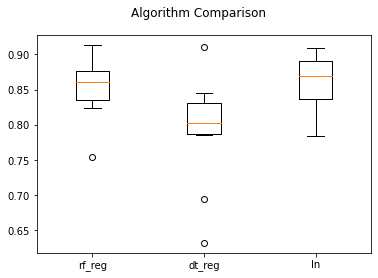

In [141]:
## Source: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

seed = 42

# append each model into a list
models = []

models.append(('rf_reg', gridsearch_rf_reg.best_estimator_))
models.append(('dt_reg', gridsearch_dt_reg.best_estimator_))
models.append(('ln', gridsearch_ln.best_estimator_))

# evaluate the models through iteration
results = []
model_names = []
scoring = 'r2'

for model_names, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_solar, y_solar, cv=kfold, scoring=scoring)
	results.append(cv_results)
	model_names.append(model_names)
	msg = "%s: %f (%f)" % (model_names, cv_results.mean(), cv_results.std())
	print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_names)
plt.show()

### t-test

In [143]:
from mlxtend.evaluate import paired_ttest_5x2cv

## Source: http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.evaluate/#paired_ttest_5x2cv

# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=gridsearch_rf_reg.best_estimator_, estimator2=gridsearch_ln.best_estimator_, X=X_solar, y=y_solar, scoring='r2', random_seed=42)

# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

# interpret the result
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')

P-value: 0.211, t-Statistic: 1.433
Algorithms probably have the same performance


In [144]:
from mlxtend.evaluate import paired_ttest_5x2cv

## Source: http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.evaluate/#paired_ttest_5x2cv

# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=gridsearch_dt_reg.best_estimator_, estimator2=gridsearch_ln.best_estimator_, X=X_solar, y=y_solar, scoring='r2', random_seed=42)

# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

# interpret the result
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')

P-value: 0.014, t-Statistic: -3.719
Difference between mean performance is probably real
